Mini-Project : Data Analysis for Marketing Strategy


Introduction

In this mini-project, we will perform data analysis to devise a marketing strategy based on various aspects like area analysis, customer analysis, product category analysis, and sales and profit time series.


👩‍🏫 👩🏿‍🏫 What You’ll learn

    How to load and preprocess a dataset.
    Techniques for area analysis to identify key markets.
    Methods for customer analysis to determine high-value customers.
    Strategies for product category analysis to identify top-performing products.
    How to analyze sales and profit trends over time.
    Application of the Pareto Principle to prioritize key drivers of sales and profit.


Dataset

The US Superstore Dataset contains the following attributes:

    Row ID: Unique ID for each row.
    Order ID: Unique Order ID for each Customer.
    Order Date: Order Date of the product.
    Ship Date: Shipping Date of the Product.
    Ship Mode: Shipping Mode specified by the Customer.
    Customer ID: Unique ID to identify each Customer.
    Customer Name: Name of the Customer.
    Segment: The segment where the Customer belongs.
    Country: Country of residence of the Customer.
    City: City of residence of the Customer.
    State: State of residence of the Customer.
    Postal Code: Postal Code of every Customer.
    Region: Region where the Customer belongs.
    Product ID: Unique ID of the Product.
    Category: Category of the product ordered.
    Sub-Category: Sub-Category of the product ordered.
    Product Name: Name of the Product.
    Sales: Sales of the Product.
    Quantity: Quantity of the Product.
    Discount: Discount provided.
    Profit: Profit/Loss incurred.


Task

First load the dataset in a notebook and preprocess it. Then use visualisations to address the following questions:

    Which states have the most sales?
    What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)
    Who is an outstanding customer in New York?
    Are there any differences among states in profitability?
    The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)
    What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ? Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)
    What are the Top 20 customers by Sales?
    Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?
    Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from faker import Faker
from faker_commerce import Provider
import random
import calendar
import matplotlib.colors as mcolors
import pandas as pd
from ipywidgets import interact, widgets
from IPython.display import display
from skimpy import skim


In [15]:
df = pd.read_excel('US Superstore data.xls')
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [10]:
print(df.describe())

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

In [11]:
print(df.describe())

            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

In [21]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9994   │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 21     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                │ datetime64  │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Row ID         │   0 │      0 │     4998 │     2885 │      1 │   2499 │   4998 │   7496 │   9994 │ ▇▇▇▇▇▇  │  │
│ │ Postal Code    │   0 │      0 │    55190 │    32060 │   1040 │  23220 │  56430 │  90010 │  99300 │ ▅▅▃▂▃▇  │  │
│ │ Sales          │   0 │      0 │    229.9 │    623.2 │  0.444 │  17.28 │  54.49 │  209.9 │  22640 │    ▇    │  │
│ │ Quantity       │   0 │      0 │     3.79 │    2.225 │      1 │      2 │      3 │      5 │     14 │  ▇▃▂▁   │  │
│ │ Discount       │   0 │      0 │   0.1562 │   0.2065 │      0 │      0 │    0.2 │    0.2 │    0.8 │ ▇▆   ▁  │  │
│ │ Profit         │   0 │      0 │    28.66 │    234.3 │  -6600 │  1.729 │  8.666 │  29.36 │   8400 │     ▇   │  │
│ └────────────────┴─────┴────────┴──────────┴──────────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column               ┃ NA     ┃ NA %      ┃ first                ┃ last                ┃ frequency         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ Order Date           │      0 │         0 │      2014-01-03      │     2017-12-30      │ None              │  │
│ │ Ship Date            │      0 │         0 │      2014-01-07      │     2018-01-05      │ None              │  │
│ └──────────────────────┴────────┴───────────┴──────────────────────┴─────────────────────┴───────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Order ID  │  0 │    0 │ CA-2016-1 │ CA-2016-1 │ CA-2014-1 │ US-2017-1 │        14 │         1 │       9994 │  │
│ │           │    │      │ 52156     │ 52156     │ 0000

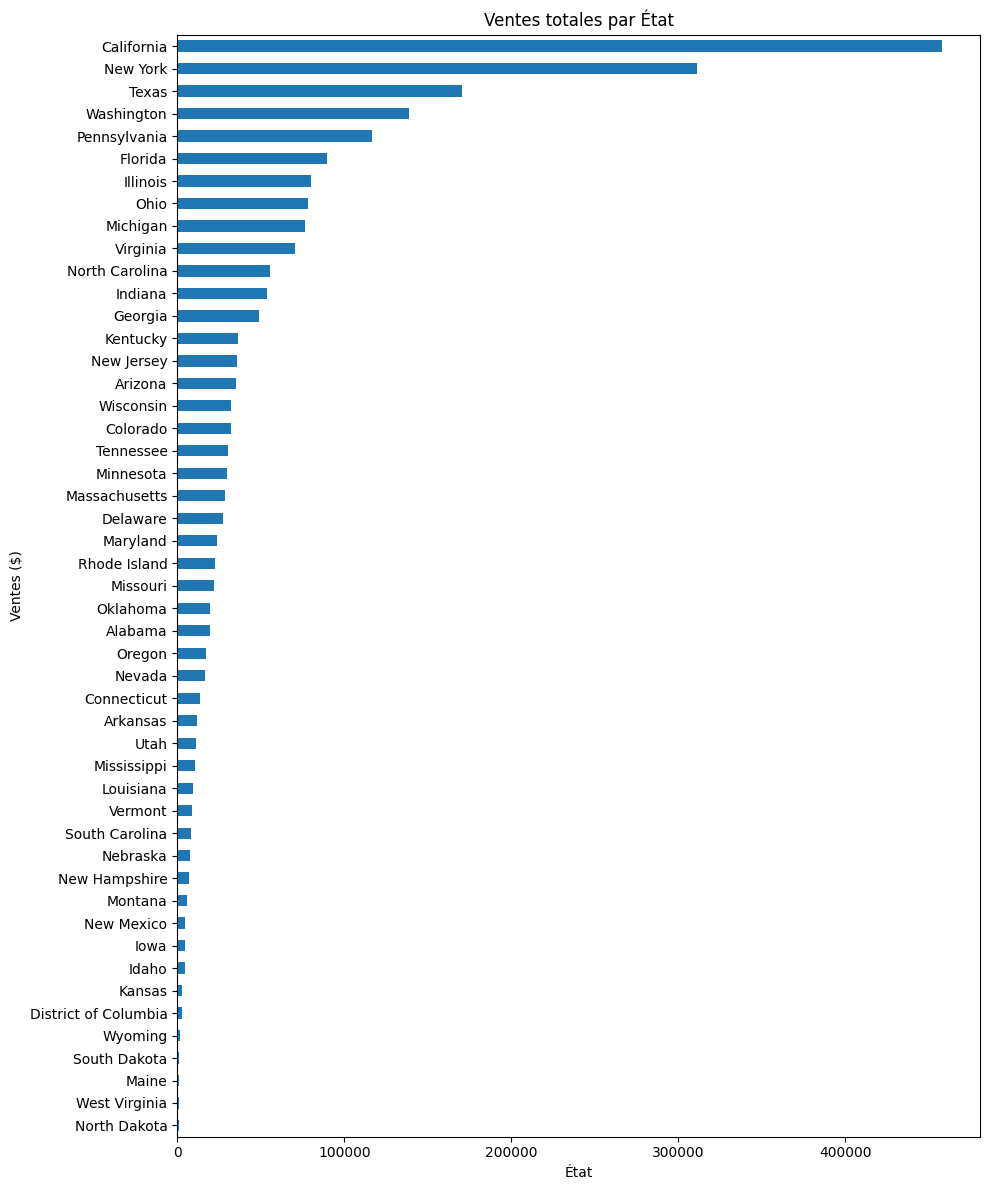

In [27]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
state_sales.plot(kind='barh', figsize=(10, 12))
plt.title('Ventes totales par État')
plt.xlabel('État')
plt.ylabel('Ventes ($)')
plt.tight_layout()
plt.show()

In [28]:
df_ny_ca = df[df['State'].isin(['New York', 'California'])]
ny_ca_summary = df_ny_ca.groupby('State')[['Sales', 'Profit']].sum()
print(ny_ca_summary)

                  Sales      Profit
State                              
California  457687.6315  76381.3871
New York    310876.2710  74038.5486


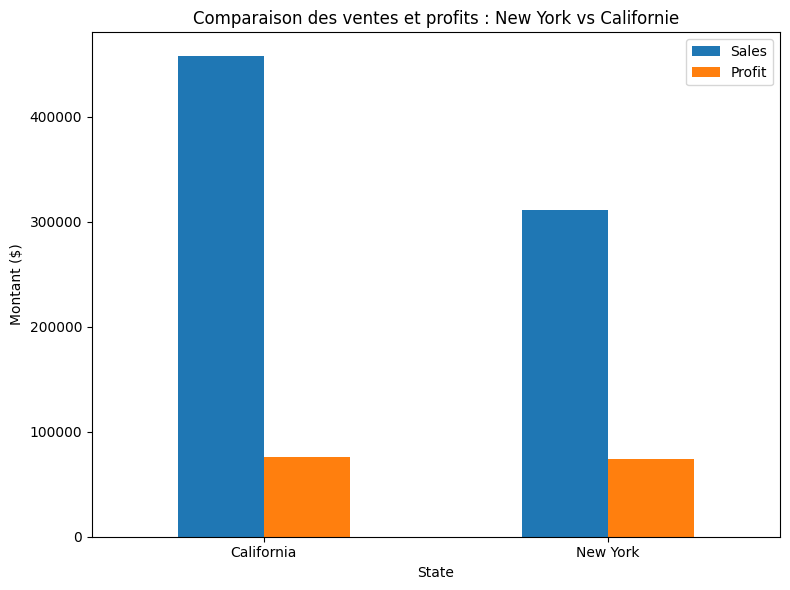

In [29]:
ny_ca_summary.plot(kind='bar', figsize=(8, 6))
plt.title('Comparaison des ventes et profits : New York vs Californie')
plt.ylabel('Montant ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

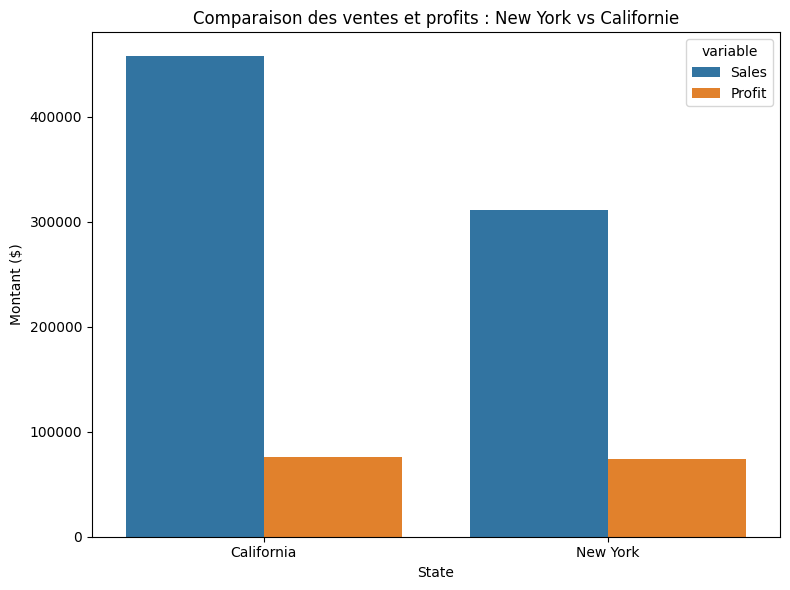

In [30]:
ny_ca_summary.reset_index(inplace=True)
ny_ca_melted = ny_ca_summary.melt(id_vars='State', value_vars=['Sales', 'Profit'])

plt.figure(figsize=(8, 6))
sns.barplot(data=ny_ca_melted, x='State', y='value', hue='variable')
plt.title('Comparaison des ventes et profits : New York vs Californie')
plt.ylabel('Montant ($)')
plt.tight_layout()
plt.show()

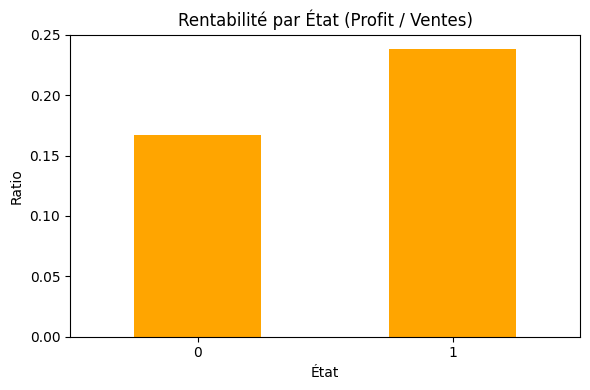

In [ ]:
ny_ca_summary['Profitability'] = ny_ca_summary['Profit'] / ny_ca_summary['Sales']
ny_ca_summary['Profitability'].plot(kind='bar', figsize=(6, 4), color='orange')
plt.title('Rentabilité par État (Profit / Ventes)')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

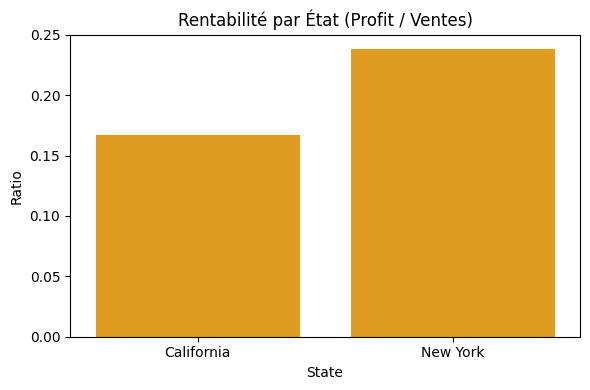

In [34]:
ny_ca_profit = ny_ca_summary.reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=ny_ca_profit, x='State', y='Profitability', color='orange')
plt.title('Rentabilité par État (Profit / Ventes)')
plt.ylabel('Ratio')
plt.tight_layout()
plt.show()